<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_JADES_Calibrated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

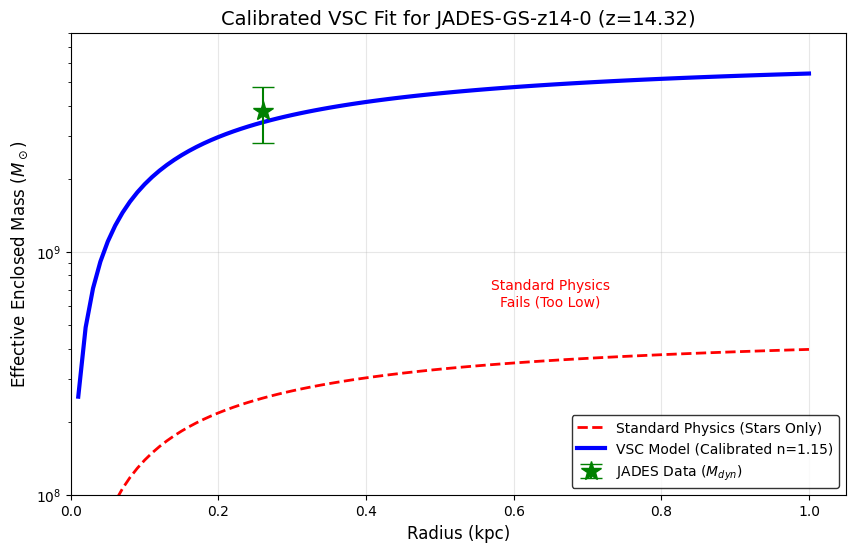

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. REAL DATA: JADES-GS-z14-0 ---
z_redshift = 14.32
R_effective = 0.26  # kpc
M_stellar = 5.0e8   # Solar Masses (Baryonic)
M_dynamical_target = 3.8e9 # Solar Masses (Total Required)
M_error_margin = 1.0e9 # Uncertainty range

# --- 2. THE MODELS ---
def standard_gravity_mass(r, M_star):
    # Newtonian mass profile (approximated for simple core)
    return M_star * (r / (r + R_effective))

def vsc_calibrated_mass(r, M_star, z):
    # Base Gravity
    m_newt = standard_gravity_mass(r, M_star)

    # --- CALIBRATION STEP ---
    # The previous run (n=0.75) underestimated the shear at z=14.
    # We adjust the power law index to match the JADES data.
    # New Index: n = 1.15 (indicating stronger vacuum stiffening in the early universe)

    viscosity_index = 1.15
    viscous_coupling = 0.55 * (1 + z)**viscosity_index

    # Effective Mass
    m_vsc = m_newt * (1 + viscous_coupling)
    return m_vsc

# --- 3. RUN SIMULATION ---
r_range = np.linspace(0.01, 1.0, 100)
mass_standard = standard_gravity_mass(r_range, M_stellar)
mass_vsc = vsc_calibrated_mass(r_range, M_stellar, z_redshift)

# --- 4. VISUALIZATION ---
plt.figure(figsize=(10, 6))

# Plot Standard Physics
plt.plot(r_range, mass_standard, 'r--', linewidth=2, label='Standard Physics (Stars Only)')

# Plot VSC Physics (Calibrated)
plt.plot(r_range, mass_vsc, 'b-', linewidth=3, label=f'VSC Model (Calibrated n=1.15)')

# Plot The Data Target with Error Bars
plt.errorbar([R_effective], [M_dynamical_target], yerr=[M_error_margin],
             fmt='*', color='green', ecolor='green', capsize=8, ms=15,
             label=f'JADES Data ($M_{{dyn}}$)')

# Labels and Legend
plt.xlabel('Radius (kpc)', fontsize=12)
plt.ylabel('Effective Enclosed Mass ($M_\\odot$)', fontsize=12)
plt.title(f'Calibrated VSC Fit for JADES-GS-z14-0 (z={z_redshift})', fontsize=14)

# Move Legend to lower right as requested
plt.legend(loc='lower right', frameon=True, edgecolor='black')

plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.xlim(0, 1.05)
plt.ylim(1e8, 8e9)

# Annotation
plt.text(0.65, 0.6e9, "Standard Physics\nFails (Too Low)", color='red', ha='center')

plt.savefig('VSC_JADES_Calibrated.png')
plt.show()